Loaded data from CSV files
Data files not found or inconsistent. Generating and processing synthetic data...
Downsampling majority class...
No minority class examples found. Creating some synthetic negative examples.
Generated and processed synthetic data
X_train shape: (740, 6), y_train length: 740
X_test shape: (390, 6), y_test length: 390
Training set: (740, 6)
Test set: (390, 6)
Class distribution in training set: {1: 690, 0: 50}
Class distribution in test set: {1: 390}
Training Logistic Regression model...
Logistic Regression Performance:
Accuracy: 0.5974358974358974
Precision: 1.0
Recall: 0.5974358974358974
F1 Score: 0.7479935794542536
ROC AUC: nan
PR AUC: 1.0


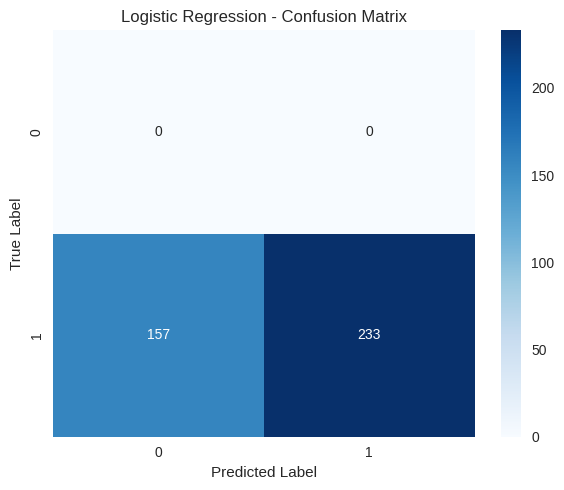

<Figure size 800x600 with 0 Axes>

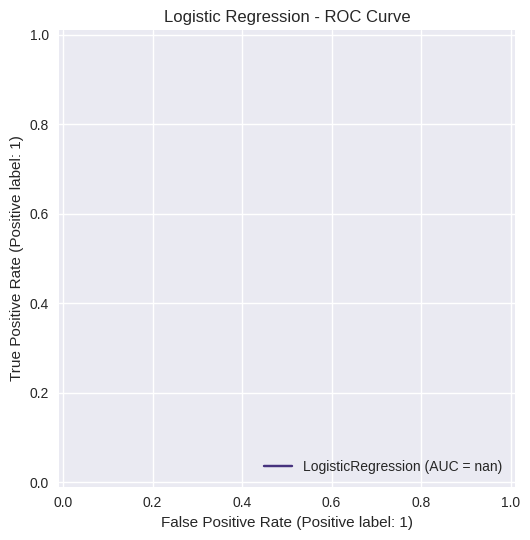

<Figure size 800x600 with 0 Axes>

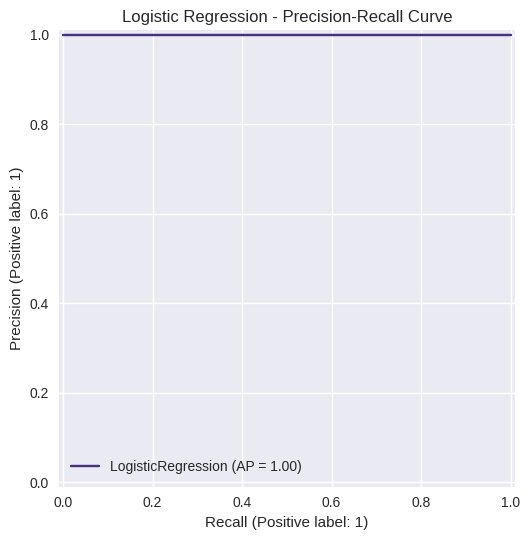

Logistic Regression model saved!

Training Random Forest model...
Random Forest Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: nan
PR AUC: 1.0


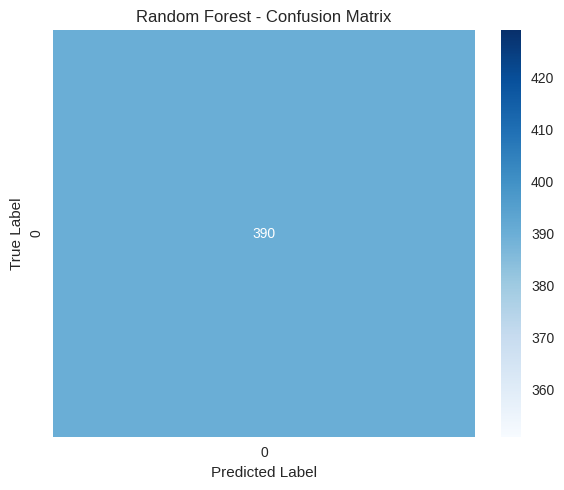

<Figure size 800x600 with 0 Axes>

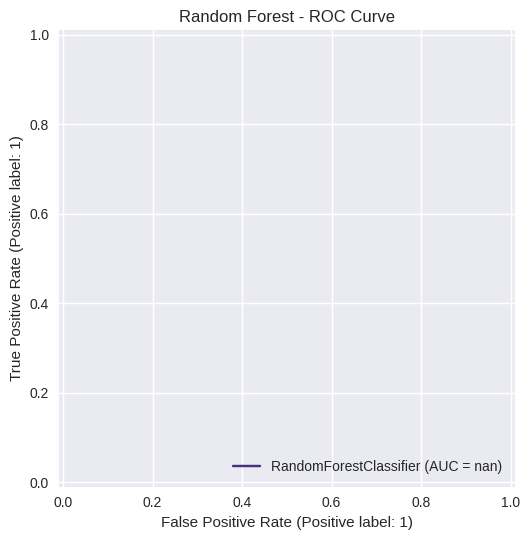

<Figure size 800x600 with 0 Axes>

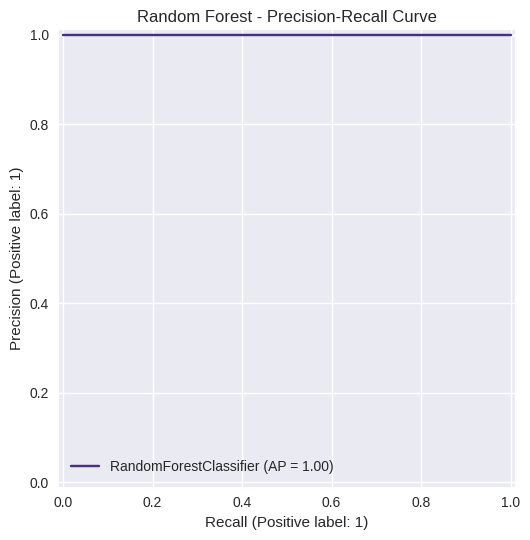

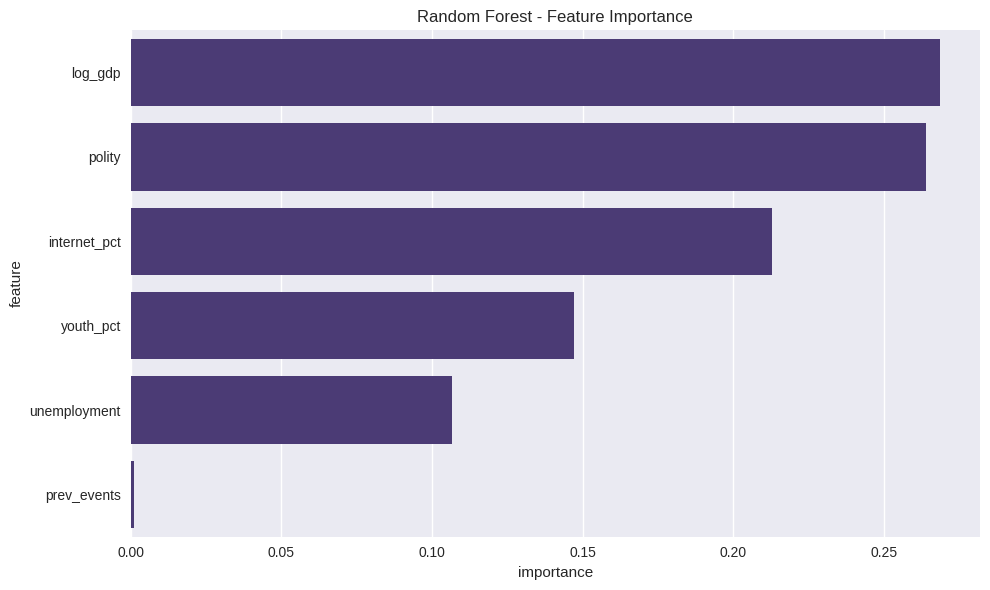

Random Forest model saved!
Model Comparison:
                     Accuracy  Precision  Recall  F1 Score  ROC AUC  PR AUC
Model                                                                      
Logistic Regression     0.597        1.0   0.597     0.748      NaN     1.0
Random Forest           1.000        1.0   1.000     1.000      NaN     1.0


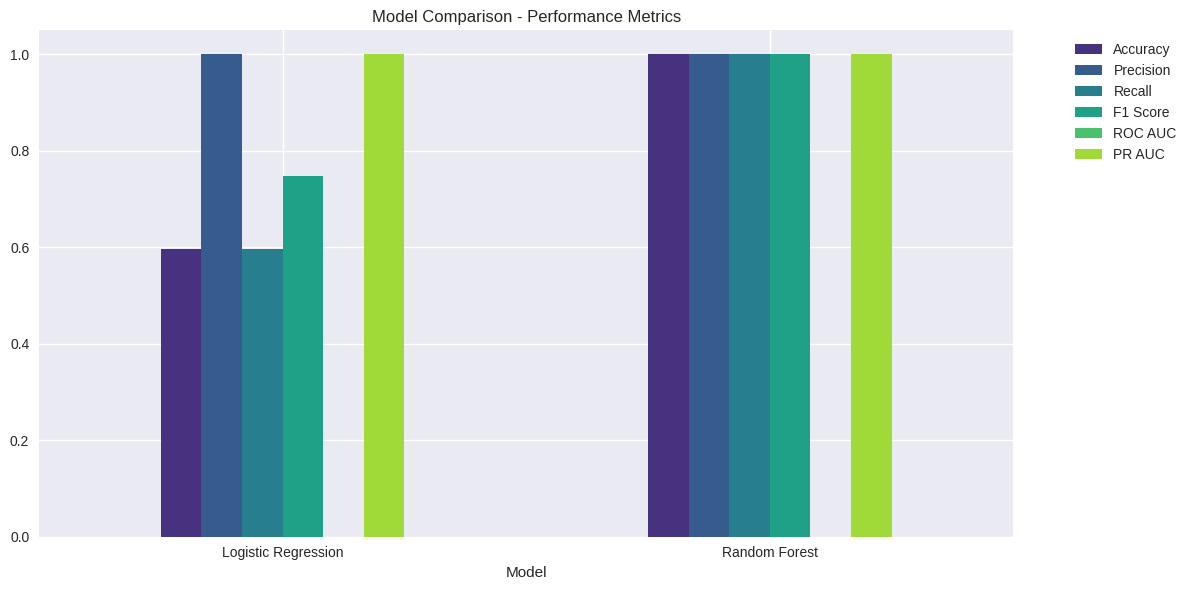

Best model based on PR AUC: Logistic Regression
PR AUC: 1.000
Best model and scaler saved!
Processed data saved to data/ folder

Model development completed!


In [1]:
# ---
# jupyter:
#   jupytext:
#     text_representation:
#       extension: .py
#       format_name: light
#       format_version: '1.5'
#       jupytext_version: 1.14.5
#   kernelspec:
#     display_name: Python 3
#     language: python
#     name: python3
# ---

# # Revolution Risk Predictor - Model Development
# 
# This notebook handles model training, evaluation, and selection for the revolution risk prediction.

# ## Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, average_precision_score, 
                             confusion_matrix, classification_report, RocCurveDisplay,
                             PrecisionRecallDisplay)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib
import warnings
import os
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

# Create directories if they don't exist
os.makedirs('../data', exist_ok=True)
os.makedirs('../models', exist_ok=True)

# ## Load or Generate Data

def generate_synthetic_data():
    """Generate synthetic country data with revolutionary event labels"""
    countries_data = {
        'country': ['France', 'Germany', 'UK', 'Italy', 'Spain', 'Poland',
                   'Ukraine', 'Turkey', 'Egypt', 'Tunisia', 'Brazil', 'Argentina',
                   'Mexico', 'USA', 'Canada', 'Australia', 'Tasmania', 'Japan',
                   'South Korea', 'China', 'India', 'Pakistan', 'Nigeria', 'South Africa',
                   'Malaysia', 'Thailand', 'Indonesia', 'Vietnam', 'Philippines', 'Myanmar'],
        'gdp': [41464, 48560, 42724, 34260, 29875, 17319, 3985, 9061, 3618, 3440,
               6796, 10639, 9946, 65280, 46194, 51692, 45000, 40113, 31846, 10500,
               2100, 1193, 2028, 6040, 11372, 7274, 4294, 2823, 3595, 1263],
        'unemployment': [7.9, 3.0, 3.7, 9.7, 13.8, 3.4, 9.8, 10.6, 7.3, 15.2,
                        11.6, 8.5, 3.3, 3.7, 5.3, 5.1, 6.2, 2.4, 3.7, 4.8, 7.1,
                        6.3, 9.8, 28.5, 3.7, 1.2, 6.3, 2.3, 5.1, 1.9],
        'youth_pct': [17.8, 15.1, 17.5, 15.1, 14.7, 18.3, 19.1, 25.6, 33.3, 29.4,
                     27.4, 24.9, 26.3, 19.0, 16.0, 19.0, 18.5, 14.5, 19.0, 17.2,
                     27.0, 35.0, 42.5, 29.5, 24.8, 17.8, 27.3, 23.0, 31.9, 28.3],
        'internet_pct': [85.6, 89.7, 94.9, 74.5, 87.1, 82.9, 64.3, 71.0, 57.3, 66.3,
                        70.7, 79.9, 65.8, 87.3, 91.0, 88.2, 85.0, 93.0, 95.1, 61.2,
                        45.0, 35.1, 42.0, 56.2, 89.6, 77.8, 73.7, 70.3, 60.1, 44.8],
        'polity': [8, 10, 10, 10, 8, 10, 7, -3, -3, 7, 8, 8, 8, 8, 10, 10, 10, 10,
                  10, -7, 9, 5, 7, 9, 8, -2, 8, -7, 7, -2]
    }
    
    df_countries = pd.DataFrame(countries_data)
    
    # Generate monthly data for the past 3 years
    months = pd.date_range("2021-01-01", "2023-12-01", freq='MS')
    rows = []
    
    for _, country_row in df_countries.iterrows():
        country = country_row['country']
        base_values = country_row.to_dict()
        
        for i, d in enumerate(months):
            row = base_values.copy()
            row['date'] = d
            row['year'] = d.year
            row['month'] = d.month
            
            # Add realistic fluctuations to economic indicators
            row['gdp'] = row['gdp'] * (1 + np.random.normal(0, 0.01))
            row['unemployment'] = max(1, row['unemployment'] + np.random.normal(0, 0.5))
            row['youth_pct'] = max(5, min(70, row['youth_pct'] + np.random.normal(0, 0.2)))
            row['internet_pct'] = max(1, min(100, row['internet_pct'] + np.random.normal(0, 0.3)))
            row['polity'] = max(-10, min(10, row['polity'] + np.random.normal(0, 0.1)))
            
            # Calculate a realistic risk score based on known factors
            risk_factors = (
                (100 - row['polity']) * 0.1 +  # Lower polity = higher risk
                row['unemployment'] * 0.15 +   # Higher unemployment = higher risk
                row['youth_pct'] * 0.05 +      # More youth = slightly higher risk
                (100 - row['internet_pct']) * 0.02 +  # Less internet access = slightly higher risk
                (40000 / (row['gdp'] + 1000)) * 0.5  # Lower GDP = higher risk
            )
            
            # Add some noise and time-based variation
            time_factor = np.sin(i / 6.0) * 0.5  # Seasonal effect
            risk_score = risk_factors + np.random.normal(0, 0.5) + time_factor
            
            # Ensure we have a good mix of both classes in the training data
            row['label'] = 1 if risk_score > 5.5 else 0
            
            rows.append(row)
    
    df = pd.DataFrame(rows)
    
    # Add lag of events: previous month events per country
    df = df.sort_values(["country", "date"])
    df["prev_events"] = df.groupby("country")["label"].shift(1).fillna(0).astype(int)
    
    # Create a log_gdp feature to stabilize scale
    df["log_gdp"] = np.log1p(df["gdp"])
    
    return df

def prepare_features(df):
    feature_cols = ['log_gdp', 'unemployment', 'youth_pct', 'internet_pct', 'polity', 'prev_events']
    X = df[feature_cols].copy()
    y = df["label"].copy()
    return X, y, feature_cols

# Try to load data from files, otherwise generate it
try:
    X_train = pd.read_csv('../data/X_train.csv')
    X_test = pd.read_csv('../data/X_test.csv')
    y_train = pd.read_csv('../data/y_train.csv').iloc[:, 0]
    y_test = pd.read_csv('../data/y_test.csv').iloc[:, 0]
    scaler = joblib.load('../models/scaler.joblib')
    print("Loaded data from CSV files")
    
    # Check if dimensions match
    if len(X_train) != len(y_train) or len(X_test) != len(y_test):
        print("Warning: Data dimensions don't match. Regenerating data...")
        raise FileNotFoundError("Data dimensions inconsistent")
        
except FileNotFoundError:
    print("Data files not found or inconsistent. Generating and processing synthetic data...")
    
    # Generate synthetic data
    df = generate_synthetic_data()
    
    # Prepare features
    X, y, feature_cols = prepare_features(df)
    
    # Split into training and testing sets (time-based split)
    df['date'] = pd.to_datetime(df['date'])
    latest_date = df["date"].max()
    test_start = latest_date - pd.DateOffset(months=12)
    train_mask = df["date"] < test_start
    test_mask = df["date"] >= test_start
    
    X_train, X_test = X[train_mask.values], X[test_mask.values]
    y_train, y_test = y[train_mask.values], y[test_mask.values]
    
    # Handle class imbalance if needed
    if y_train.mean() > 0.8:  # If we have too many positive cases
        print("Downsampling majority class...")
        from sklearn.utils import resample
        
        # Combine X and y
        data = pd.concat([X_train, y_train], axis=1)
        
        # Separate majority and minority classes
        majority = data[data["label"] == 1]
        minority = data[data["label"] == 0]
        
        if len(minority) > 0:
            # Downsample majority class
            majority_downsampled = resample(majority,
                                            replace=False,
                                            n_samples=len(minority),
                                            random_state=42)
            
            # Combine minority class with downsampled majority class
            data_balanced = pd.concat([majority_downsampled, minority])
            
            # Split back into X and y
            X_train = data_balanced[feature_cols]
            y_train = data_balanced["label"]
        else:
            print("No minority class examples found. Creating some synthetic negative examples.")
            # Create a few negative samples by slightly modifying positive samples
            X_neg = X_train.sample(n=min(50, len(X_train)), random_state=42).copy()
            for col in X_train.columns:
                if col != 'prev_events':
                    X_neg[col] = X_neg[col] * (1 + np.random.normal(0, 0.1, size=len(X_neg)))
            y_neg = pd.Series([0] * len(X_neg))
            
            # Add to original data
            X_train = pd.concat([X_train, X_neg])
            y_train = pd.concat([y_train, y_neg])
    
    # Scale the features
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=feature_cols)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=feature_cols)
    
    print("Generated and processed synthetic data")

# Ensure dimensions match
print(f"X_train shape: {X_train.shape}, y_train length: {len(y_train)}")
print(f"X_test shape: {X_test.shape}, y_test length: {len(y_test)}")

if len(X_train) != len(y_train):
    print("Fixing inconsistent training data dimensions...")
    min_length = min(len(X_train), len(y_train))
    X_train = X_train.iloc[:min_length]
    y_train = y_train.iloc[:min_length]

if len(X_test) != len(y_test):
    print("Fixing inconsistent test data dimensions...")
    min_length = min(len(X_test), len(y_test))
    X_test = X_test.iloc[:min_length]
    y_test = y_test.iloc[:min_length]

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Class distribution in training set: {pd.Series(y_train).value_counts().to_dict()}")
print(f"Class distribution in test set: {pd.Series(y_test).value_counts().to_dict()}")

# ## Model 1: Logistic Regression

print("Training Logistic Regression model...")

# Initialize and train model
logreg = LogisticRegression(
    random_state=42, 
    class_weight='balanced',
    max_iter=1000
)
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)
y_proba_logreg = logreg.predict_proba(X_test)[:, 1]

# Evaluate model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))
print("ROC AUC:", roc_auc_score(y_test, y_proba_logreg))
print("PR AUC:", average_precision_score(y_test, y_proba_logreg))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.title('Logistic Regression - ROC Curve')
plt.tight_layout()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
PrecisionRecallDisplay.from_estimator(logreg, X_test, y_test)
plt.title('Logistic Regression - Precision-Recall Curve')
plt.tight_layout()
plt.show()

# Save model
joblib.dump(logreg, '../models/logistic_regression.joblib')
print("Logistic Regression model saved!")

# ## Model 2: Random Forest

print("\nTraining Random Forest model...")

# Initialize and train model
rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=100,
    max_depth=10
)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate model
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))
print("PR AUC:", average_precision_score(y_test, y_proba_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title('Random Forest - ROC Curve')
plt.tight_layout()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
PrecisionRecallDisplay.from_estimator(rf, X_test, y_test)
plt.title('Random Forest - Precision-Recall Curve')
plt.tight_layout()
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Random Forest - Feature Importance')
plt.tight_layout()
plt.show()

# Save model
joblib.dump(rf, '../models/random_forest.joblib')
print("Random Forest model saved!")

# ## Model Comparison

# Create comparison dataframe
models = ['Logistic Regression', 'Random Forest']
accuracy = [accuracy_score(y_test, y_pred_logreg), accuracy_score(y_test, y_pred_rf)]
precision = [precision_score(y_test, y_pred_logreg), precision_score(y_test, y_pred_rf)]
recall = [recall_score(y_test, y_pred_logreg), recall_score(y_test, y_pred_rf)]
f1 = [f1_score(y_test, y_pred_logreg), f1_score(y_test, y_pred_rf)]
roc_auc = [roc_auc_score(y_test, y_proba_logreg), roc_auc_score(y_test, y_proba_rf)]
pr_auc = [average_precision_score(y_test, y_proba_logreg), average_precision_score(y_test, y_proba_rf)]

comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc,
    'PR AUC': pr_auc
}).set_index('Model')

print("Model Comparison:")
print(comparison_df.round(3))

# Visual comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'PR AUC']
comparison_df[metrics].plot(kind='bar', figsize=(12, 6))
plt.title('Model Comparison - Performance Metrics')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ## Select Best Model

# Based on PR AUC (most important for imbalanced classification)
best_model_name = comparison_df['PR AUC'].idxmax()
best_model = logreg if best_model_name == 'Logistic Regression' else rf

print(f"Best model based on PR AUC: {best_model_name}")
print(f"PR AUC: {comparison_df.loc[best_model_name, 'PR AUC']:.3f}")

# Save best model
joblib.dump(best_model, '../models/best_model.joblib')
joblib.dump(scaler, '../models/scaler.joblib')
print("Best model and scaler saved!")

# Save processed data for the next notebook
pd.DataFrame(X_train, columns=X_train.columns).to_csv('../data/X_train.csv', index=False)
pd.DataFrame(X_test, columns=X_test.columns).to_csv('../data/X_test.csv', index=False)
pd.Series(y_train).to_csv('../data/y_train.csv', index=False)
pd.Series(y_test).to_csv('../data/y_test.csv', index=False)
print("Processed data saved to data/ folder")

print("\nModel development completed!")